# Advanced Regression - Assignment - Abhijit Majumdar

In [1]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
# reading the data set
house_cost_data = pd.read_csv(r'C:\Users\abhij\Downloads\train.csv')

In [7]:
# conducting basic checks
house_cost_data.shape

(1460, 81)

In [9]:
house_cost_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
house_cost_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
#checking the basic stats and quantiles of data
house_cost_data.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
#checking for nulls
round(house_cost_data.isnull().sum()/len(house_cost_data.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

#### Setting threshold of 10% for nulls

In [13]:
round(house_cost_data.isnull().sum()/len(house_cost_data.index),2)[round(house_cost_data.isnull().sum()/
                                                                 len(house_cost_data.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [14]:
#removing the above fields from dataset
house_cost_data = house_cost_data.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

#### Calculating the age of different components built of house

In [15]:
house_cost_data['YearBuiltAge'] = house_cost_data.YearBuilt.max()-house_cost_data.YearBuilt
house_cost_data['YearRemodAddAge'] = house_cost_data.YearRemodAdd.max()-house_cost_data.YearRemodAdd
house_cost_data['GarageYrBltAge'] = house_cost_data.GarageYrBlt.max()-house_cost_data.GarageYrBlt
house_cost_data['YrSoldAge'] = house_cost_data.YrSold.max()-house_cost_data.YrSold


In [17]:
#display new fields
house_cost_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuiltAge','YearRemodAddAge',
             'GarageYrBltAge','YrSoldAge']].sample(5)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuiltAge,YearRemodAddAge,GarageYrBltAge,YrSoldAge
667,1994,1998,1994.0,2008,16,12,16.0,2
921,1900,2003,NaN,2008,110,7,NaN,2
1382,1920,1950,1989.0,2006,90,60,21.0,4
454,1976,1976,1976.0,2006,34,34,34.0,4
253,1964,1991,1964.0,2007,46,19,46.0,3


In [18]:
#Dropping original Year columns
house_cost_data = house_cost_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

#### Imputing missing values

In [21]:
house_cost_data.MasVnrType.fillna('None',inplace=True)
house_cost_data.MasVnrArea.fillna(house_cost_data.MasVnrArea.mean(),inplace=True)
house_cost_data.BsmtQual.fillna('TA',inplace=True)
house_cost_data.BsmtCond.fillna('TA',inplace=True)
house_cost_data.BsmtExposure.fillna('No',inplace=True)
house_cost_data.BsmtFinType1.fillna('Unf',inplace=True)
house_cost_data.BsmtFinType2.fillna('Unf',inplace=True)
house_cost_data.GarageType.fillna('Attchd',inplace=True)
house_cost_data.GarageYrBltAge.fillna(-1,inplace=True) #since some houses don't have garages, replacing with -1
house_cost_data.GarageFinish.fillna('Unf',inplace=True)
house_cost_data.GarageQual.fillna('TA',inplace=True)
house_cost_data.GarageCond.fillna('TA',inplace=True)

In [23]:
#removing ID column
house_cost_data = house_cost_data.drop('Id',axis='columns')

### Plotting graphs for EDA

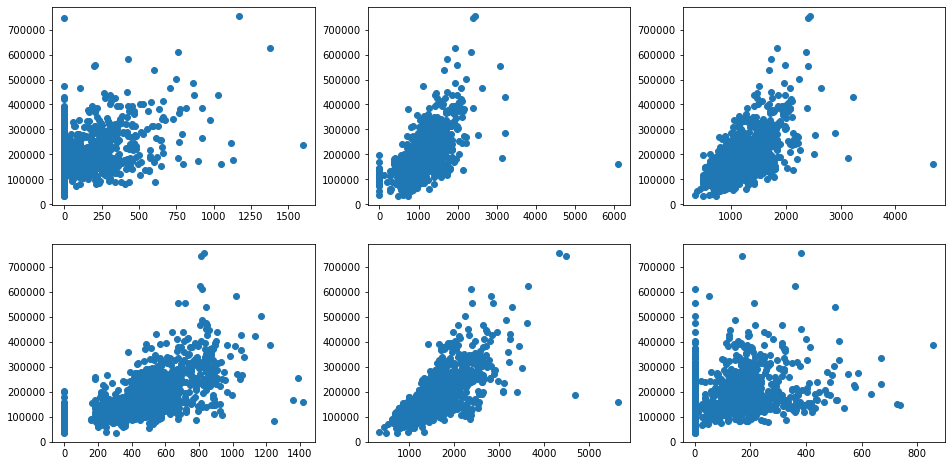

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_cost_data.MasVnrArea,house_cost_data.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_cost_data.TotalBsmtSF,house_cost_data.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_cost_data['1stFlrSF'],house_cost_data.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_cost_data['GarageArea'],house_cost_data.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_cost_data['GrLivArea'],house_cost_data.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_cost_data['WoodDeckSF'],house_cost_data.SalePrice)

### PLotting heat map to check correlation between variables

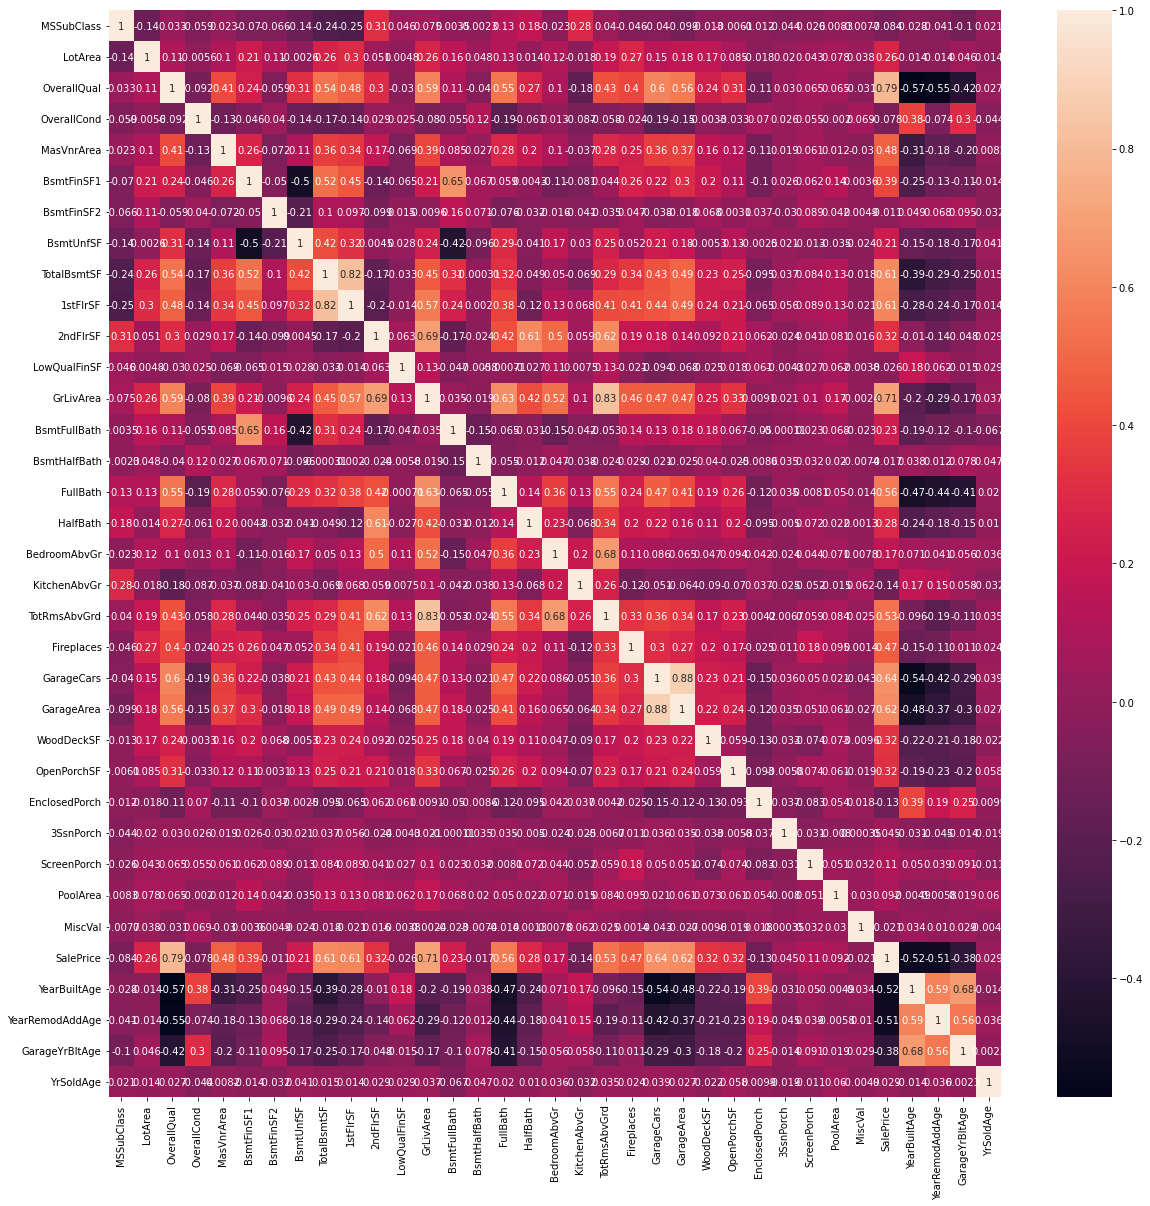

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(house_cost_data[list(house_cost_data.dtypes[house_cost_data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [27]:
#Writing function to remove Outliers with lower quantile = .25 and upper quantile = .99
(1460, 71)
num_col = list(house_cost_data.dtypes[house_cost_data.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_cost_data = drop_outliers(house_cost_data)

In [29]:
house_cost_data.shape

(1441, 73)

In [30]:
#19 rows of data reduced

In [31]:
house_cost_data[list(house_cost_data.dtypes[house_cost_data.dtypes=='object'].index)].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [33]:
# SOme of the fields are ordinal in nature and can be used as numbers

In [34]:
house_cost_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [35]:
house_cost_data['LandSlope'] = house_cost_data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_cost_data['ExterQual'] = house_cost_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_cost_data['BsmtQual'] = house_cost_data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_cost_data['BsmtCond'] = house_cost_data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_cost_data['BsmtExposure'] = house_cost_data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_cost_data['BsmtFinType1'] = house_cost_data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_cost_data['BsmtFinType2'] = house_cost_data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_cost_data['HeatingQC'] = house_cost_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_cost_data['CentralAir'] = house_cost_data.CentralAir.map({'N':0,'Y':1})
house_cost_data['KitchenQual'] = house_cost_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_cost_data['GarageFinish'] = house_cost_data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_cost_data['GarageQual'] = house_cost_data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_cost_data['GarageCond'] = house_cost_data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_cost_data['ExterCond'] = house_cost_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_cost_data['LotShape'] = house_cost_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [52]:
# Checking the modifed columns
house_cost_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()


,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [78]:
house_cost_data = house_cost_data.drop(['Street'],axis='columns')

KeyError: "['Street'] not found in axis"

In [79]:
house_cost_data = house_cost_data.drop(['Utilities'],axis='columns')

In [54]:
# Creating and joining dummy variables
dummy_col = pd.get_dummies(house_cost_data[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_cost_data = pd.concat([house_cost_data,dummy_col],axis='columns')

house_cost_data = house_cost_data.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

KeyError: "None of [Index(['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',\n       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',\n       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',\n       'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'SaleType',\n       'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [80]:
# Checking distribution of target variable

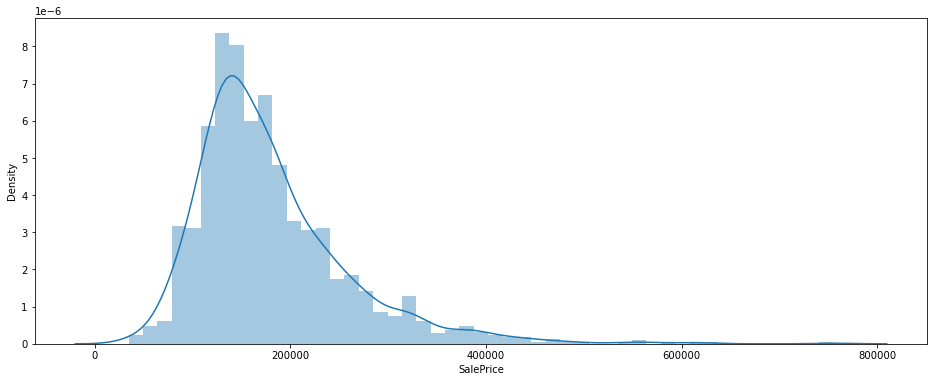

In [81]:
plt.figure(figsize=(16,6))
sns.distplot(house_cost_data.SalePrice)
plt.show()

### Creating train and test split of 70-30

In [82]:
df_train,df_test = train_test_split(house_cost_data,train_size=0.7,test_size=0.3,random_state=42)

In [83]:
house_cost_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


##### Scaling train data set

In [84]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

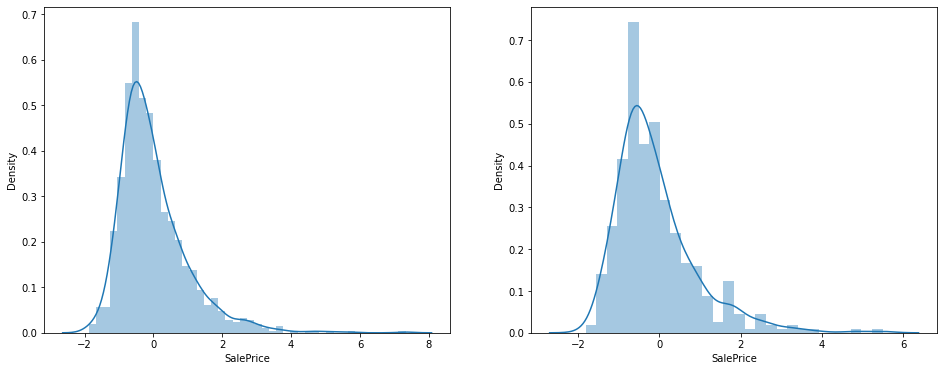

In [85]:
# Checking distribution after scaling
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [86]:
# Splitting dependent and independent variables
y_train = df_train.pop('SalePrice')
X_train = df_train

In [87]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [88]:
# Using RFE to find optimal no of features

In [89]:
len(X_train.columns)

192

In [91]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,step=70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=70)

In [92]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [93]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

#### Filtering the train and test set for RFE selected columns

In [94]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Lasso Regression Model

In [95]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8987212628712239
0.8514171135816698


In [96]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.131),
 ('LotArea', 0.2),
 ('LotShape', 0.106),
 ('LandSlope', 0.132),
 ('OverallQual', 0.143),
 ('OverallCond', 0.088),
 ('MasVnrArea', 0.033),
 ('ExterQual', 0.285),
 ('ExterCond', 0.137),
 ('BsmtQual', 0.104),
 ('BsmtCond', 0.004),
 ('BsmtExposure', -0.0),
 ('BsmtFinType1', 0.081),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', -0.003),
 ('BsmtFinSF2', 0.201),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.006),
 ('1stFlrSF', -0.064),
 ('2ndFlrSF', 0.247),
 ('LowQualFinSF', -0.12),
 ('GrLivArea', -0.046),
 ('BsmtFullBath', -0.127),
 ('BsmtHalfBath', -0.118),
 ('FullBath', 0.0),
 ('HalfBath', -0.057),
 ('BedroomAbvGr', 0.217),
 ('KitchenAbvGr', 0.392),
 ('KitchenQual', -0.123),
 ('TotRmsAbvGrd', -0.054),
 ('Fireplaces', 0.236),
 ('GarageFinish', 0.0),
 ('GarageCars', 0.102),
 ('GarageArea', -0.08),
 ('GarageQual', 0.096),
 ('GarageCond', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -2.069),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0)

In [97]:
# Now will use GridSearchCV to improve our model with the optimal value of alpha

In [98]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [99]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008083,0.004660,0.004356,0.003998,0.001,{'alpha': 0.001},0.844125,0.905760,0.833172,0.872020,...,0.904405,0.900943,0.897365,0.898772,0.897357,0.911361,0.899930,0.896246,0.900498,0.004321
1,0.006386,0.006504,0.002872,0.004560,0.010,{'alpha': 0.01},0.816117,0.864693,0.833873,0.830667,...,0.847061,0.844509,0.842822,0.842409,0.842162,0.875324,0.845318,0.840085,0.847131,0.009657
2,0.003524,0.006165,0.003323,0.006176,0.100,{'alpha': 0.1},0.737548,0.818259,0.772408,0.755161,...,0.789924,0.797495,0.791999,0.793016,0.787017,0.823361,0.792930,0.787835,0.795238,0.009959
3,0.004821,0.006914,0.002360,0.004607,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.005784,0.006770,0.000523,0.001060,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


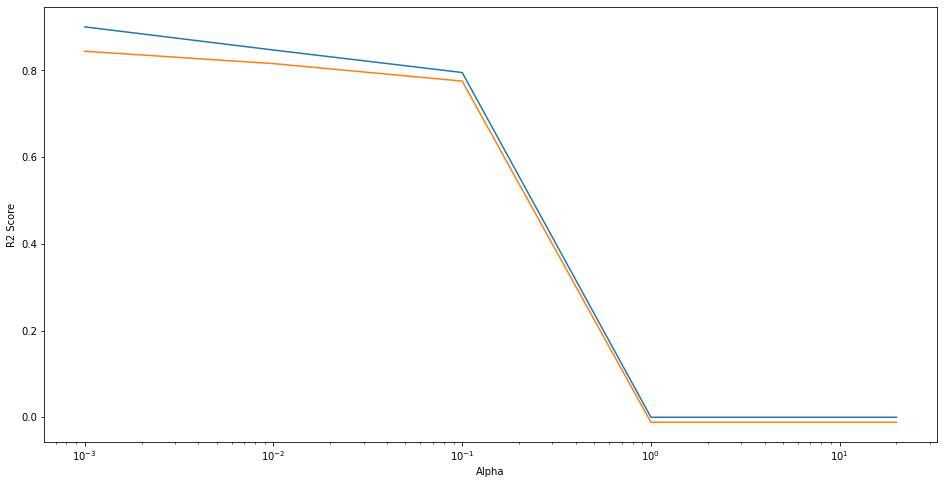

In [100]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [101]:
# Checking the best parameter(alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [102]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8987212628712239
0.8514171135816698


In [103]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [104]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
57,LotConfig_FR2,1.540031
29,KitchenAbvGr,0.392195
93,Condition2_Norm,0.309635
7,ExterQual,0.285078
21,2ndFlrSF,0.247481
32,Fireplaces,0.236054
59,LotConfig_Inside,0.224636
28,BedroomAbvGr,0.216810
15,BsmtFinSF2,0.200687
1,LotArea,0.199831


### Ridge Regression Model

In [105]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9063311074275927
0.8405117960057358


#### As we can see the above alpha value is not optimal for ridge there are sign of overfitting and the clear difference we can see in the train and test score. 
#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [106]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [107]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006782,0.001883,0.003790,0.001322,0.001,{'alpha': 0.001},0.830984,0.909362,0.789168,0.874051,...,0.913149,0.908863,0.905707,0.906409,0.905341,0.918278,0.907821,0.904111,0.908404,0.004164
1,0.004787,0.002034,0.002692,0.000898,0.010,{'alpha': 0.01},0.831942,0.909308,0.791817,0.874027,...,0.913143,0.908861,0.905706,0.906407,0.905340,0.918278,0.907819,0.904110,0.908402,0.004164
2,0.006184,0.002082,0.003091,0.001042,0.100,{'alpha': 0.1},0.838793,0.908730,0.812757,0.873806,...,0.912799,0.908761,0.905589,0.906310,0.905217,0.918219,0.907698,0.904001,0.908271,0.004150
3,0.004090,0.001041,0.002692,0.000898,0.200,{'alpha': 0.2},0.843151,0.908039,0.828707,0.873572,...,0.912112,0.908533,0.905330,0.906085,0.904954,0.918089,0.907430,0.903759,0.907989,0.004132
4,0.004888,0.001041,0.002592,0.000662,0.500,{'alpha': 0.5},0.849030,0.905909,0.854999,0.872899,...,0.909534,0.907519,0.904225,0.905088,0.903857,0.917553,0.906278,0.902703,0.906814,0.004138


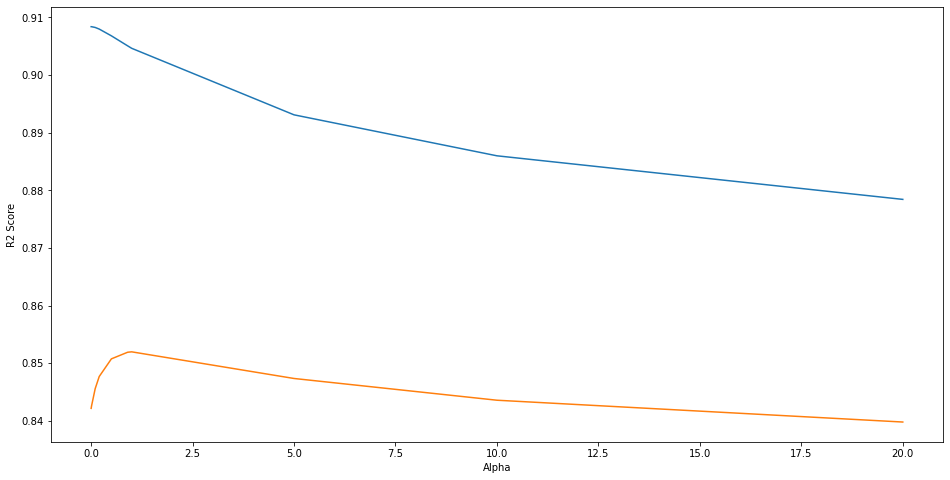

In [108]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

#### Creating model based on above graph

In [109]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [110]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9036388606136648
0.849711846144007


In [111]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [112]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
57,LotConfig_FR2,1.515661
29,KitchenAbvGr,0.432328
93,Condition2_Norm,0.430441
38,WoodDeckSF,0.417542
41,3SsnPorch,0.384025
53,LandContour_HLS,0.359270
32,Fireplaces,0.351682
59,LotConfig_Inside,0.306122
7,ExterQual,0.294258
37,GarageCond,0.288140


### THe R2 value are almost same for both Ridge and Lasso models. 

Best alpha value for Lasso : {'alpha': 0.001}
Best alpha value for Ridge : {'alpha': 0.1}

#### After comparing both the models we figure that below features are best explaining the data set

- LotConfig_FR2
- KitchenAbvGr
- Condition2_Norm
- ExterQual
- 2ndFlrSF
- Fireplaces
- LotConfig_Inside
- BedroomAbvGr
- BsmtFinSF2
